
   # 📌 Companies and Taxi Peru // mini-project 

***

   #### owner: Golovin Alexey


Import libraries block:

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 
import seaborn as sns
%matplotlib inline

Let's create our own function. Write a function called **"read_n_agg"** that:

1. takes one parameter - the file path
2. reads a file with ';' as a separator using the passed path
3. calculates the average income by company, moving the company column to the index (as_index=True)
4. returns the resulting dataframe

In [3]:
df = pd.read_csv('3_companies.csv', sep=';')
df.head()

,company,income,date
0,"ЗАО «Доронин, Колобов и Калашникова»",1221331958,2019-09-09
1,ООО «Авдеев»,21116804375,1972-12-21
2,РАО «Аксенов Сорокина»,79257158759,2007-03-05
3,Ларионов Инкорпорэйтед,36799366126,2011-08-11
4,Григорьев Инкорпорэйтед,48201837498,1989-09-02


In [5]:
def read_n_agg(x) :
    aggregate = pd.read_csv(x,sep=';') \
                  .groupby('company', as_index=True) \
                  .agg({'income': 'mean'}) 
    return aggregate

In [11]:
read_n_agg('3_companies.csv')

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


In [20]:
taxi = pd.read_csv('3_taxi_peru.csv', sep=';')
taxi.head(3)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,iPhone,NaN,NaN


In [21]:
taxi.dtypes

journey_id           object
user_id              object
driver_id            object
taxi_id              object
icon                 object
start_type           object
start_at             object
start_lat            object
start_lon            object
end_at               object
end_lat              object
end_lon              object
end_state            object
driver_start_lat     object
driver_start_lon     object
arrived_at           object
source               object
driver_score        float64
rider_score         float64
dtype: object

Columns `start_at`, `end_at`, `arrived_at` looks like dates, but in object type. Let's try 2 different options to convert them to **datetime**

In [16]:
taxi = pd.read_csv('3_taxi_peru.csv', sep=';',parse_dates=['end_at','arrived_at'])
taxi.head(2)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN


In [7]:
taxi['start_at'] = pd.to_datetime(taxi['start_at'])
taxi.dtypes          

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

Now we see that all that columns in `datetime64` format

Check which *platform* **(source)** had the most orders. Provide the answer as a percentage rounded to the nearest integer

In [23]:
taxi.source.unique()

array(['iPhone', 'Android', 'web', 'iPad', nan, 'Wap'], dtype=object)

In [28]:
a = taxi['source'].value_counts().max()
b = taxi.source.count()
d = a / b * 100

print(a)
print(b)
print(round(d,2))  

9741
22988
42.37


Answer - **42.37%**

To make the difference more visual, let's try to visualize the indicators.

Aggregate the data and create a bar chart with the platform names (**source**) on the x-axis and the number of orders (**absolute values**) on the y-axis

In [30]:
barchart = taxi.groupby("source", as_index = False)  \
               .agg({'journey_id':'count'}) \
               .sort_values(by='journey_id',ascending=False)
barchart

,source,journey_id
3,iPhone,9741
4,web,7631
0,Android,4909
2,iPad,571
1,Wap,136


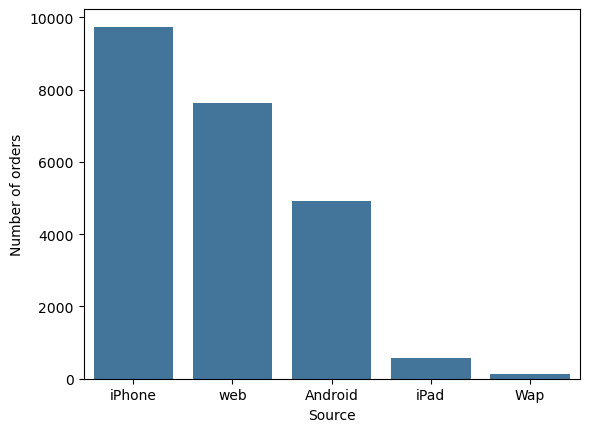

In [40]:
ax = sns.barplot(x='source', y='journey_id', data=barchart, color='#115f9a', alpha=0.85 )
ax.set(xlabel='Source', ylabel='Number of orders')
sns.despine # remove the frame
plt.show()

Let's try to create a more complex chart!

Using `sns.countplot` and the hue parameter, visualize the distribution of the end_state variable (order final state) by platform (**source**).

In other words, on the x-axis, place the platform, and use the order state as color. Then select the correct statements.

<AxesSubplot:xlabel='source', ylabel='count'>

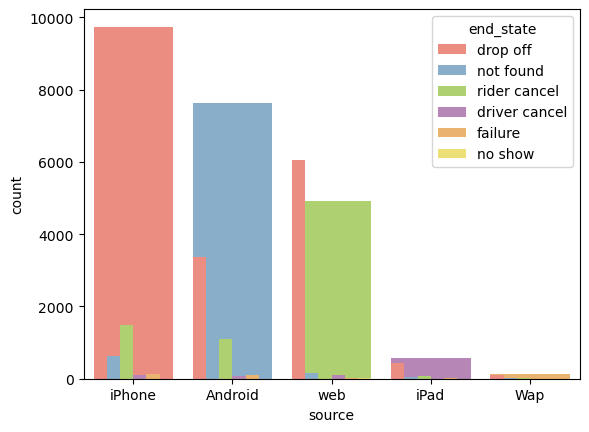

In [46]:
sns.set_palette(["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65"])
sns.barplot(x = 'source', y = 'journey_id', data = barchart)
sns.countplot(x = 'source', hue = 'end_state', data = df)

Let's calculate driver score, and after that visualize it

In [49]:
driver_score_counts = df.groupby(['driver_score','journey_id'], as_index = False ) \
                        .agg({'journey_id': 'count'}) \
                        .value_counts(normalize = True).mul(100).round(2) \
                        .reset_index() \
                        .rename(columns = {0: 'percentage'})  \
                        .sort_values('driver_score', ascending = True) \
                        .drop('journey_id', axis=1)
driver_score_counts                        

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


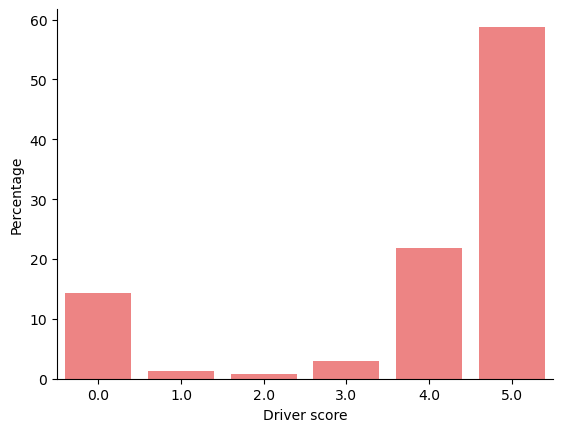

In [53]:
# alpha parameter takes an integer between 0 and 1 and specifies the transparency of each histogram:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color = 'red', alpha = 0.55)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  
plt.show()

 Сalculate the distribution of ratings among drivers as a percentage. With `.mul()` 

In [55]:
rider_score_counts =  df.groupby(['rider_score','journey_id'], as_index = False ) \
                        .agg({'journey_id': 'count'}) \
                        .value_counts(normalize = True).mul(100).round(2) \
                        .reset_index() \
                        .rename(columns = {0: 'percentage'})  \
                        .sort_values('rider_score', ascending = True) \
                        .drop('journey_id', axis=1)
rider_score_counts                        
 

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


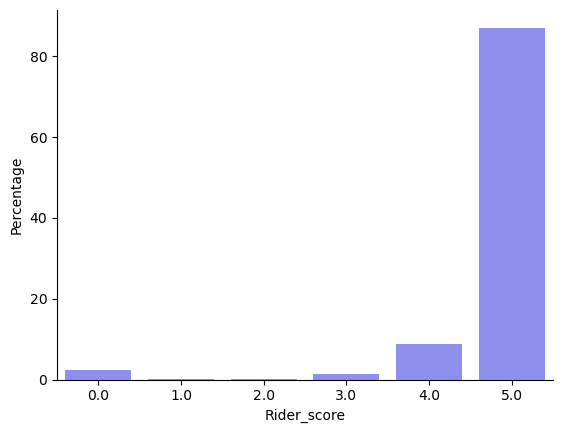

In [56]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color = 'blue', alpha = 0.5)
ax.set(xlabel='Rider_score', ylabel='Percentage')
sns.despine() 
plt.show()

! ! ! ! ! !!! ! ! !  ! ! ! ! ! !!! ! ! !  ! ! ! ! ! !!! ! ! !  ! ! ! ! ! !!! ! ! !  

In [16]:
#урок 4 

taxi['wait_time'] = (taxi['arrived_at'] - taxi['start_at']).astype('timedelta64[m]')
taxi[['arrived_at', 'start_at' , 'wait_time']].head(5)


,arrived_at,start_at,wait_time
0,2010-11-16 17:02:00,2010-11-16 16:44:00,18.0
1,NaT,2010-06-01 00:34:00,NaN
2,NaT,2010-05-31 05:01:00,NaN
3,NaT,2010-06-01 00:29:00,NaN
4,2010-09-11 23:50:00,2010-09-11 23:55:00,-5.0


In [17]:
taxi.loc[(taxi.start_type == 'reserved') & (taxi.wait_time > 0)].driver_id.value_counts().idxmax()

'406921adcca37705ef527b4246c0cfea'

In [18]:
taxi['month'] = taxi['start_at'].dt.month
taxi['weekday'] = taxi['start_at'].dt.strftime('%A')
taxi.weekday.head()



0     Tuesday
1     Tuesday
2      Monday
3     Tuesday
4    Saturday
Name: weekday, dtype: object

[Text(0, 0.5, 'Orders'), Text(0.5, 0, 'Month')]

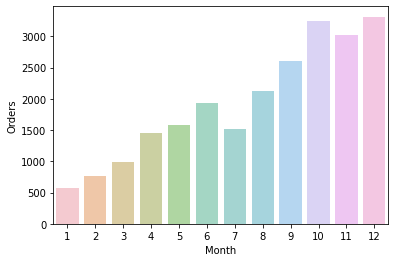

In [19]:
## Урок 4 Задание 13
"""Постройте график числа заказов по месяцам (month). 
Подумайте, с чем может быть связана полученная картина. 
Вопрос: в каком летнем месяце было сделано наименьшее число заказов? 
В качестве ответа введите номер месяца (6, 7 или 8). 
"""

month_count =  taxi.groupby(['month'], as_index = False ) \
                        .agg({'journey_id': 'count'}) \
                        .value_counts(normalize = True).mul(100).round(2) \
                        .reset_index()   \
                        .sort_values('journey_id', ascending = True) 


ax = sns.barplot(x='month', y='journey_id', data=month_count, alpha = 0.5)
ax.set(xlabel='Month', ylabel='Orders')

[Text(0, 0.5, 'Orders'), Text(0.5, 0, 'Month')]

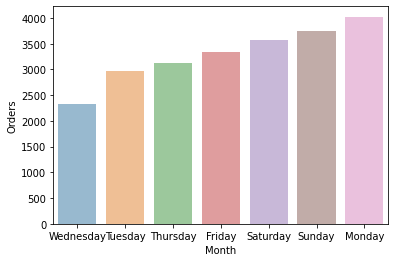

In [20]:
month_count =  taxi.groupby(['weekday'], as_index = False ) \
                        .agg({'journey_id': 'count'}) \
                        .value_counts(normalize = True).mul(100).round(2) \
                        .reset_index()   \
                        .sort_values('journey_id', ascending = True) 


ax = sns.barplot(x='weekday', y='journey_id', data=month_count, alpha = 0.5)
ax.set(xlabel='Month', ylabel='Orders')

In [21]:
mau =  taxi.groupby(['weekday'].nunique(), as_index = False ) \
            .nunique() \
            .agg({'user_id': 'count'}) \
            .value_counts(normalize = True).mul(100).round(2) \
            .sort_values('user_id', ascending = True) 


ax = sns.barplot(x='weekday', y='user_id', data=month_count, color='grey', alpha = 0.5)
ax.set(xlabel='Month', ylabel='Users')

AttributeError: 'list' object has no attribute 'nunique'

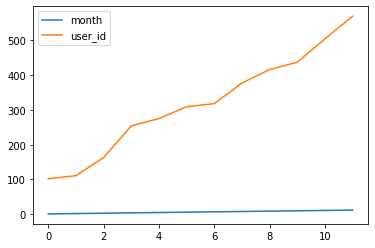

In [32]:
mau = taxi.groupby(['month'], as_index = False).user_id.nunique()
    
mau.plot.line()

In [33]:
mau

,month,user_id
0,1,102
1,2,111
2,3,163
3,4,254
4,5,275
5,6,309
6,7,318
7,8,377
8,9,416
9,10,437
